In [22]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as ssn
ssn.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [2]:
#loading the data
bank_data=pd.read_csv('Downloads/bank-full.csv',sep=';')
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
bank_data[bank_data.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [25]:
bank_data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

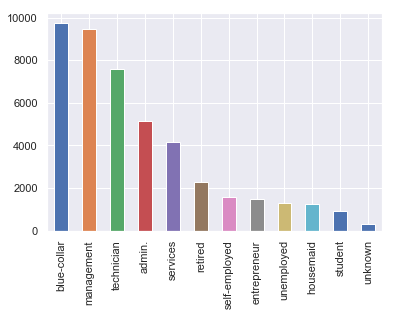

In [23]:
bank_data.job.value_counts().plot(kind='bar')

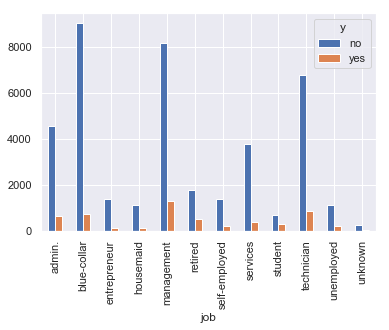

In [24]:
pd.crosstab(bank_data['job'],bank_data['y']).plot(kind='bar')

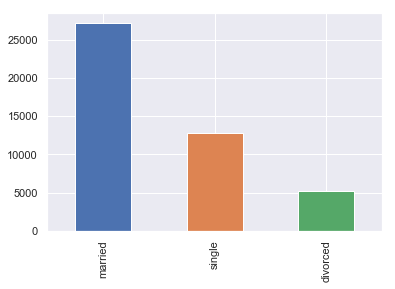

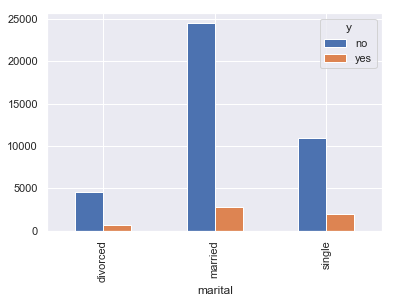

In [26]:
bank_data.marital.value_counts().plot(kind='bar')
pd.crosstab(bank_data['marital'],bank_data['y']).plot(kind='bar')

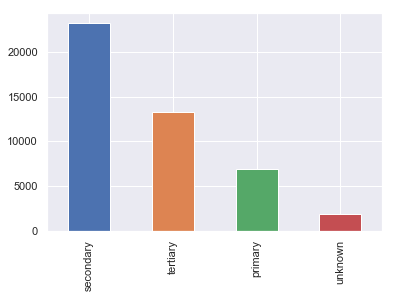

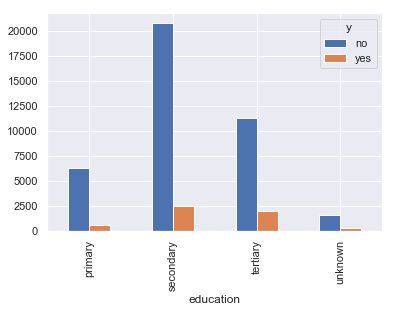

In [27]:
bank_data.education.value_counts().plot(kind='bar')
pd.crosstab(bank_data['education'],bank_data['y']).plot(kind='bar')

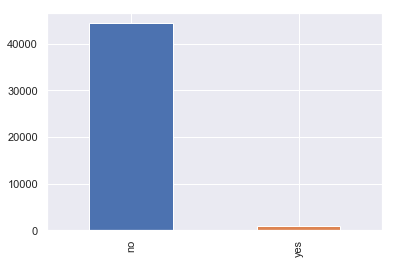

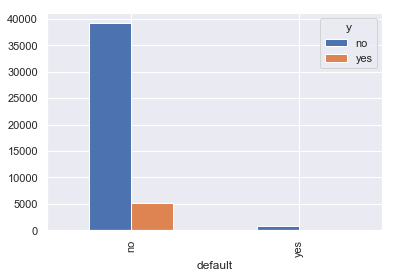

In [28]:
bank_data.default.value_counts().plot(kind='bar')
pd.crosstab(bank_data['default'],bank_data['y']).plot(kind='bar')

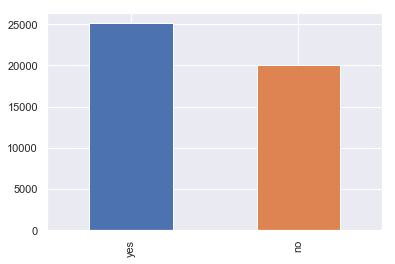

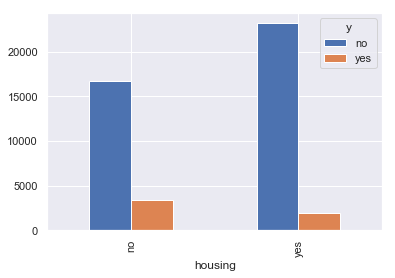

In [29]:
bank_data.housing.value_counts().plot(kind='bar')
pd.crosstab(bank_data['housing'],bank_data['y']).plot(kind='bar')

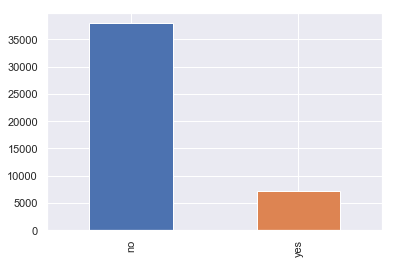

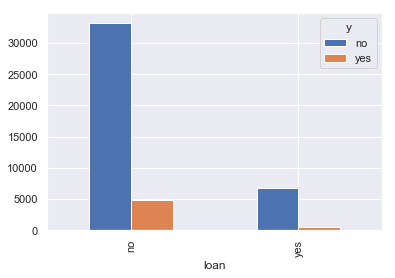

In [30]:
bank_data.loan.value_counts().plot(kind='bar')
pd.crosstab(bank_data['loan'],bank_data['y']).plot(kind='bar')

In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()

In [35]:
bank_data['job']= label_encoder.fit_transform(bank_data['job'])
bank_data['marital']= label_encoder.fit_transform(bank_data['marital'])
bank_data['education']= label_encoder.fit_transform(bank_data['education'])

In [37]:
bank_data['marital'].unique()

array([1, 2, 0], dtype=int64)

In [38]:
bank_data['default']= label_encoder.fit_transform(bank_data['default'])
bank_data['housing']= label_encoder.fit_transform(bank_data['housing'])
bank_data['loan']= label_encoder.fit_transform(bank_data['loan'])
bank_data['y']= label_encoder.fit_transform(bank_data['y'])

In [49]:
bank_data['housing']= label_encoder.fit_transform(bank_data['housing'])

In [50]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,9,2,1,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,2,1,1,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,1,1,3,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,11,2,3,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


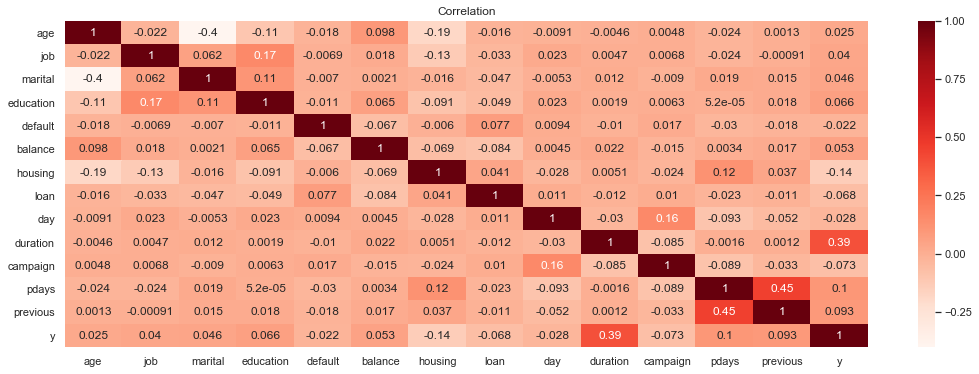

In [53]:
corr=bank_data.corr()
plt.figure(figsize=(18,6))
plt.title("Correlation")
sns.heatmap(corr,cmap="Reds",annot=True)

In [54]:
bank_data=pd.get_dummies(bank_data,columns=['contact','poutcome','month'],drop_first=True)
pd.set_option("display.max.columns", None)

In [56]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,4,1,2,0,2143,1,0,5,261,1,-1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,44,9,2,1,0,29,1,0,5,151,1,-1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,33,2,1,1,0,2,1,1,5,76,1,-1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,47,1,1,3,0,1506,1,0,5,92,1,-1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,33,11,2,3,0,1,0,0,5,198,1,-1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


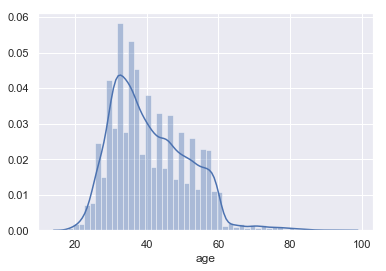

In [57]:
sns.distplot(bank_data['age'])

In [69]:
#X = bank_data.iloc[:,:-1].values
X=bank_data.drop('y',axis=1)
#Y=bank_data.iloc[:,-1].values
Y=bank_data['y']

In [73]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)

In [83]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((36168, 29), (9043, 29), (36168,), (9043,))

## Model Building

In [74]:
model = LogisticRegression().fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [78]:
Y_pred_train = model.predict(X_train)

In [79]:
Y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [89]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(Y_train,Y_pred_train)

array([[31208,   762],
       [ 2789,  1409]], dtype=int64)

In [80]:
accuracy_train = accuracy_score(Y_pred_train,Y_train)
print("The accuracy of model on training dataset is {}".format(accuracy))

The accuracy of model on training dataset is 0.9018192877681929


In [81]:
Y_pred_test = model.predict(X_test)

In [82]:
Y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [90]:
confusion_matrix(Y_test,Y_pred_test)

array([[7759,  193],
       [ 719,  372]], dtype=int64)

In [85]:
accuracy_test = accuracy_score(Y_pred_test,Y_test)
print("The accuracy of model on training dataset is {}".format(accuracy_test))

The accuracy of model on training dataset is 0.8991485126617274


## Model Validation

In [86]:
X_Val=model.predict(X)

In [91]:
# Confusion Matrix for the model accuracy
confusion_matrix=confusion_matrix(Y,X_Val)
print(confusion_matrix)

[[38967   955]
 [ 3508  1781]]


In [92]:
(38967+1781)/(38967+1781+955+3508)*100

90.1285085488045

In [95]:
print(classification_report(Y,X_Val))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     39922
           1       0.65      0.34      0.44      5289

   micro avg       0.90      0.90      0.90     45211
   macro avg       0.78      0.66      0.69     45211
weighted avg       0.89      0.90      0.89     45211



## ROC CURVE

In [93]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Text(0, 0.5, 'True Positive Rate')

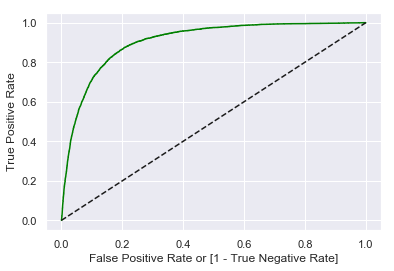

In [97]:
fpr, tpr, thresholds = roc_curve(Y, model.predict_proba (X)[:,1])

auc = roc_auc_score(Y, X_Val)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='green', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [103]:
print(round(auc*100,4))

65.6407
